In [1]:
# the below code is for displaying the output from all lines of python code within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd # package for data analysis
import numpy as np # package for numerical computations

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )

In [3]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [4]:
loan_data.drop(loan_data.columns[loan_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [6]:
loan_data.shape

(491, 13)

In [7]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             481 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      462 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   478 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 50.0+ KB


In [9]:
loan_data.isna().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
loan_data.Loan_Status.value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

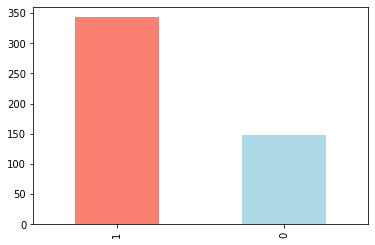

In [11]:
loan_data.Loan_Status.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [12]:
loan_data = loan_data.drop(columns=['Loan_ID']) ## Dropping Loan ID



In [13]:
categorical_col = []
continous_col = []
for column in loan_data.columns:
    print('==============================')
    print(f"{column} : {loan_data[column].unique()}")
    if len(loan_data[column].unique()) <= 15:
        categorical_col.append(column)
    else:
        continous_col.append(column)

Gender : ['Female' 'Male' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '3+' '2' '1' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
ApplicantIncome : [ 4547  5703  4333  4695  6700  4344  6000  5285 14683  3200  2045  3523
  3667 11757  5417  6500  3159  6250 12841 14880  2425  3875  2620  6045
  4600  8333  4755  4230  2346  2699  3400  5568  2882  4166  2720  1782
 11500  3988  3717  9323  3993  4758  4124  6283  3572 10750  1625  3762
  3250  7200  5819  3707  3588  2987  3000  7578  5000 51763  3417  2333
  4583  3539 10000  3237  6875  3750  3015  8750  6325  3254  4133  2239
  4467  4692  8000  8334  3917  6256  1809  2479  4887  5167  2577  5500
  4707  4300  3459  6417  3867  2221 39147 10833  2309  3927  5695  4691
  4009 13262  4180  5726  3992  1958  9538  3358  4095  3189  4106  3497
  5166  5708  5821  2895  3596 10139 10416  3100  4301  3583  4625  5667
  2130  3167  2799  4350  2550  3087  2583  9167  9963  5516  3208  2383
  2058  2917

In [14]:
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [15]:
continous_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [16]:
loan_data["Gender"].fillna(loan_data["Gender"].mode()[0],inplace=True)
loan_data["Married"].fillna(loan_data["Married"].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data["Dependents"].mode()[0],inplace=True)
loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0],inplace=True)
loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0],inplace=True)
loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mode()[0],inplace=True)

In [17]:
loan_data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].median(),inplace=True)

In [19]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       491.000000         491.000000  491.000000
mean       5401.189409        1589.730998  144.395112
std        6419.427177        2919.320624   84.956932
min         150.000000           0.000000   17.000000
25%        2923.500000           0.000000  100.000000
50%        3865.000000        1229.000000  126.000000
75%        5705.500000        2251.500000  160.000000
max       81000.000000       41667.000000  700.000000


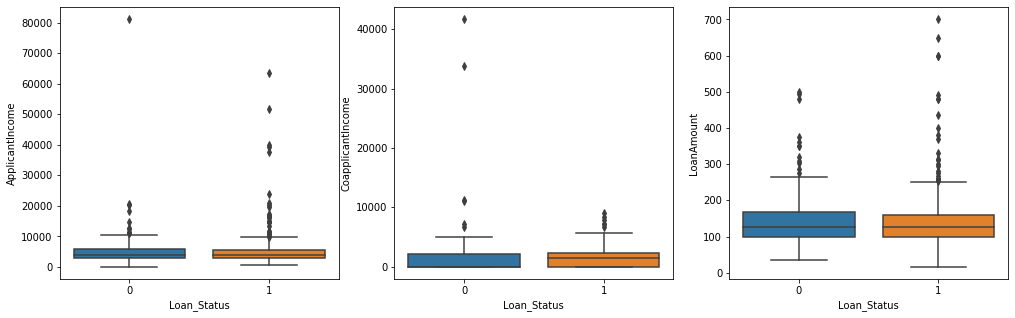

In [20]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(continous_col):
    sns.boxplot(y=cat_col,data=loan_data,x='Loan_Status',ax=axes[idx])

print(loan_data[continous_col].describe())
plt.subplots_adjust(hspace=1)

In [21]:
from sklearn.preprocessing import LabelEncoder

category_obj= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'] 
encoder= LabelEncoder()
for i in category_obj:   
    loan_data[i] = encoder.fit_transform(loan_data[i]) 
loan_data.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int64
dtype: object

'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

 
 1   Gender             481 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      462 non-null    object 
 11  Property_Area      491 non-null    object 


(12.5, -0.5)

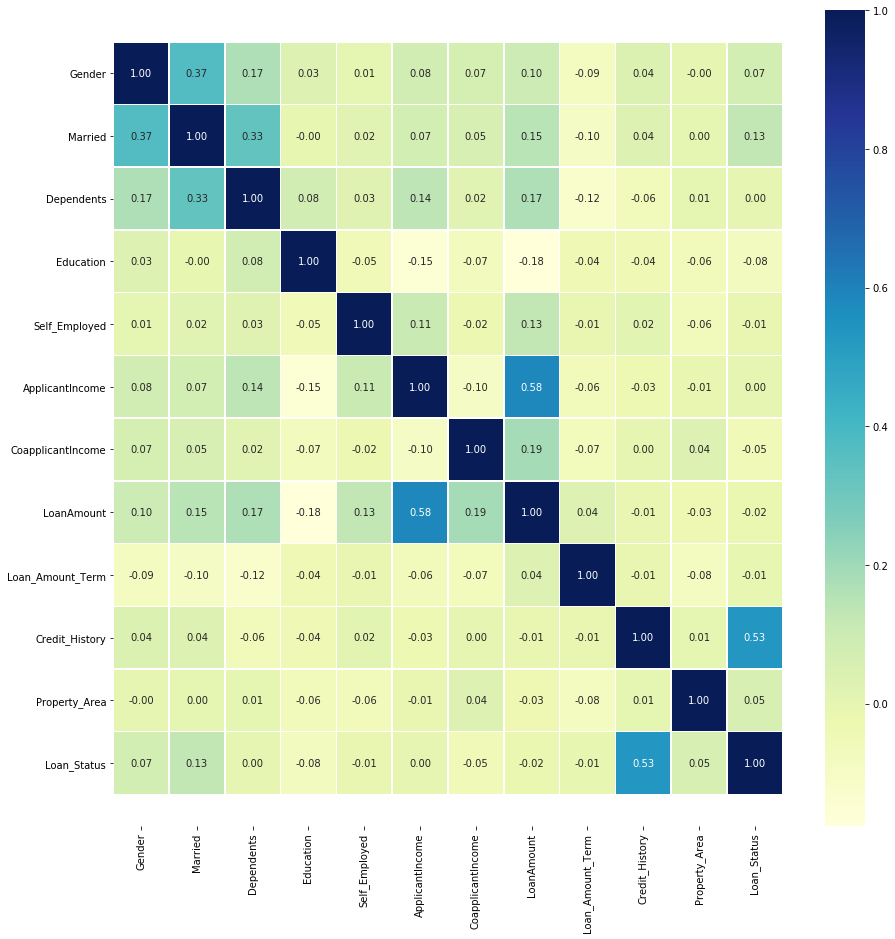

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = loan_data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

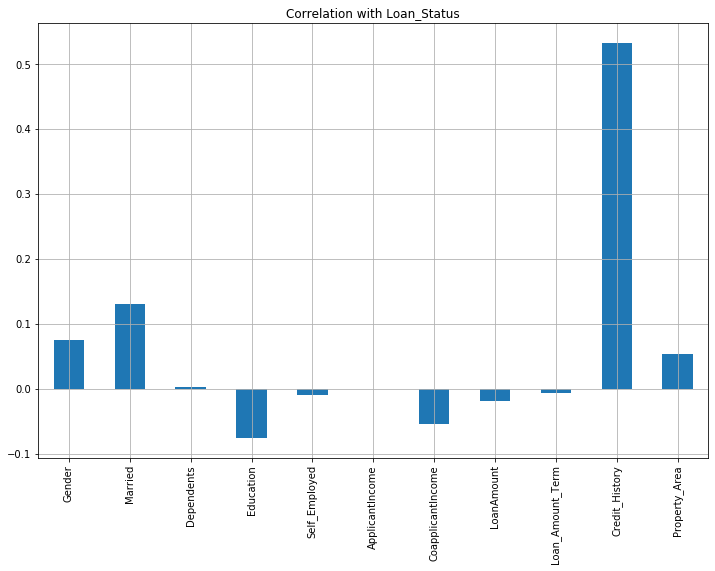

In [23]:
loan_data.drop('Loan_Status', axis=1).corrwith(loan_data.Loan_Status).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with Loan_Status")

In [24]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1,1
1,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0,1
2,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2,0
3,1,1,0,1,1,4695,0.0,96.0,360.0,1.0,2,1
4,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1,1


In [25]:
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [26]:
categorical_col.remove('Loan_Status')
#categorical_col.remove('Loan_Amount_Term')

#loan_data_dummy = pd.get_dummies(loan_data, columns = categorical_col)

loan_data_dummy = pd.get_dummies(loan_data,drop_first=True)

In [27]:
loan_data_dummy.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1,1
1,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0,1
2,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2,0
3,1,1,0,1,1,4695,0.0,96.0,360.0,1.0,2,1
4,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1,1
5,1,1,0,1,1,4344,736.0,87.0,360.0,1.0,1,0
6,1,1,0,0,0,6000,2250.0,265.0,360.0,1.0,1,0
7,1,1,1,1,0,5285,1430.0,161.0,360.0,0.0,1,1
8,1,1,0,0,0,14683,2100.0,304.0,360.0,1.0,0,0
9,1,0,0,1,0,3200,2254.0,126.0,180.0,0.0,2,0


In [28]:
loan_data_dummy.shape

(491, 12)

In [29]:
X = loan_data_dummy.drop(columns='Loan_Status')
y = loan_data_dummy['Loan_Status']

In [30]:
X.shape

(491, 11)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [32]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test = imp_train.transform(X_test)


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter = 1000, solver='liblinear')     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model_lr.fit(X_train,y_train)


print_score(model_lr, X_train, y_train, X_test, y_test, train=True)
print_score(model_lr, X_train, y_train, X_test, y_test, train=False)

LogisticRegression(max_iter=1000, solver='liblinear')

Train Result:
Accuracy Score: 80.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.918367    0.787172  0.803571    0.852770      0.826664
recall       0.381356    0.985401  0.803571    0.683379      0.803571
f1-score     0.538922    0.875203  0.803571    0.707062      0.773975
support    118.000000  274.000000  0.803571  392.000000    392.000000
_______________________________________________
Confusion Matrix: 
 [[ 45  73]
 [  4 270]]

Test Result:
Accuracy Score: 83.84%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.835443  0.838384   0.842722      0.839854
recall      0.566667   0.956522  0.838384   0.761594      0.838384
f1-score    0.680000   0.891892  0.838384   0.785946      0.827682
support    30.000000  69.000000  0.838384  99.000000     99.000000
________

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

print_score(model_knn, X_train, y_train, X_test, y_test, train=True)
print_score(model_knn, X_train, y_train, X_test, y_test, train=False)

KNeighborsClassifier()

Train Result:
Accuracy Score: 75.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.651515    0.769939      0.75    0.710727      0.734291
recall       0.364407    0.916058      0.75    0.640233      0.750000
f1-score     0.467391    0.836667      0.75    0.652029      0.725507
support    118.000000  274.000000      0.75  392.000000    392.000000
_______________________________________________
Confusion Matrix: 
 [[ 43  75]
 [ 23 251]]

Test Result:
Accuracy Score: 68.69%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.466667   0.726190  0.686869   0.596429      0.647547
recall      0.233333   0.884058  0.686869   0.558696      0.686869
f1-score    0.311111   0.797386  0.686869   0.554248      0.650030
support    30.000000  69.000000  0.686869  99.000000     99.000000
________

# SVM

In [36]:
from sklearn.svm import SVC


model_svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
model_svm.fit(X_train, y_train)

print_score(model_svm, X_train, y_train, X_test, y_test, train=True)
print_score(model_svm, X_train, y_train, X_test, y_test, train=False)

SVC(gamma=0.1)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    118.0  274.0       1.0      392.0         392.0
_______________________________________________
Confusion Matrix: 
 [[118   0]
 [  0 274]]

Test Result:
Accuracy Score: 69.70%
_______________________________________________
CLASSIFICATION REPORT:
              0          1  accuracy  macro avg  weighted avg
precision   0.0   0.696970   0.69697   0.348485      0.485767
recall      0.0   1.000000   0.69697   0.500000      0.696970
f1-score    0.0   0.821429   0.69697   0.410714      0.572511
support    30.0  69.000000   0.69697  99.000000     99.000000
_______________________________________________
Confusion Matrix: 
 [[ 0 30]
 [ 0 69]]


C:\Users\Kinjal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

print_score(model_dt, X_train, y_train, X_test, y_test, train=True)
print_score(model_dt, X_train, y_train, X_test, y_test, train=False)

DecisionTreeClassifier(random_state=42)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    118.0  274.0       1.0      392.0         392.0
_______________________________________________
Confusion Matrix: 
 [[118   0]
 [  0 274]]

Test Result:
Accuracy Score: 71.72%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.523810   0.859649  0.717172   0.691729      0.757880
recall      0.733333   0.710145  0.717172   0.721739      0.717172
f1-score    0.611111   0.777778  0.717172   0.694444      0.727273
support    30.000000  69.000000  0.717172  99.000000     99.000000
_______________________________________________
Confusion Matr

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model_rf = RandomForestClassifier(n_estimators=1000, random_state=42)
model_rf.fit(X_train, y_train)

print_score(model_rf, X_train, y_train, X_test, y_test, train=True)
print_score(model_rf, X_train, y_train, X_test, y_test, train=False)

RandomForestClassifier(n_estimators=1000, random_state=42)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    118.0  274.0       1.0      392.0         392.0
_______________________________________________
Confusion Matrix: 
 [[118   0]
 [  0 274]]

Test Result:
Accuracy Score: 82.83%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.782609   0.842105  0.828283   0.812357      0.824076
recall      0.600000   0.927536  0.828283   0.763768      0.828283
f1-score    0.679245   0.882759  0.828283   0.781002      0.821088
support    30.000000  69.000000  0.828283  99.000000     99.000000
_______________________________________________
Confusion Matr

# Xg Boost

In [39]:
from xgboost import XGBClassifier

model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

print_score(model_xg, X_train, y_train, X_test, y_test, train=True)
print_score(model_xg, X_train, y_train, X_test, y_test, train=False)

C:\Users\Kinjal\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    118.0  274.0       1.0      392.0         392.0
_______________________________________________
Confusion Matrix: 
 [[118   0]
 [  0 274]]

Test Result:
Accuracy Score: 82.83%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.740741   0.861111  0.828283   0.800926      0.824635
recall      0.666667   0.898551  0.828283   0.782609      0.828283
f1-score    0.701754   0.879433  0.828283   0.790594      0.825591
support    30.000000  69.000000  0.828283  99.000000     99.000000
_______________________________________________
Confusion Matr

In [40]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,4547,0.0,115.0,360.0,1.0,1
1,1,1,3,1,1,5703,0.0,130.0,360.0,1.0,0
2,0,1,0,0,0,4333,2451.0,110.0,360.0,1.0,2
3,1,1,0,1,1,4695,0.0,96.0,360.0,1.0,2
4,1,1,2,0,0,6700,1750.0,230.0,300.0,1.0,1


# Model Deploying Steps

In [41]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [42]:
#def predict_loan_status(applicantincome,coapincome,loanamt,gender,married,dependents,edu,emp,loanterm,credhist,propertyarea): 

def predict_loan_status(gender,married,dependents,edu,emp,applicantincome,coapincome,loanamt,loanterm,credhist,propertyarea):    
    x = np.zeros(len(X.columns))
    x[0] = gender
    x[1] = married
    x[2] = dependents
    x[3] = edu
    x[4] = emp
    x[5] = applicantincome
    x[6] = coapincome
    x[7] = loanamt
    x[8] = loanterm
    x[9] = credhist
    x[10] = propertyarea
    
        
    return  model_lr.predict([x])[0]

    #loan_status1 =  model_lr.predict([x])[0]
    #if loan_status1 == 1:
    #    return "Congratulations Your loan is granted!!"
    #else:
     #   return "Sorry your loan is denied."
    

In [43]:
import pickle
with open('loan_prediction_model.pickle','wb') as f:
    pickle.dump(model_lr,f)


In [44]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

192